# **SVM - Regression**
The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):

 * Cement
 * Slag
 * Fly ash
 * Water
 * SP
 * Coarse Aggr.
 * Fine Aggr.

Output variables (3):

 * SLUMP (cm)
 * FLOW (cm)
 * 28-day Compressive Strength (Mpa)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv(r'/content/Concrete Slump.csv')
df

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...,...
98,99,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,100,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,101,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,102,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


In [ ]:
df.drop('No',axis = 1)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


# Exploratory Data Analysis

In [ ]:
df.isnull().sum()

,0
No,0
Cement,0
Slag,0
Fly ash,0
Water,0
SP,0
Coarse Aggr.,0
Fine Aggr.,0
SLUMP(cm),0
FLOW(cm),0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,103.0,52.000000,29.877528,1.00,26.50,52.00,77.500,103.00
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

# Visualization

In [ ]:
df.corr() ['Compressive Strength (28-day)(Mpa)']

,Compressive Strength (28-day)(Mpa)
No,0.186274
Cement,0.445725
Slag,-0.331588
Fly ash,0.444393
Water,-0.254235
SP,-0.037871
Coarse Aggr.,-0.160684
Fine Aggr.,-0.154484
SLUMP(cm),-0.223358
FLOW(cm),-0.124029


<Axes: >

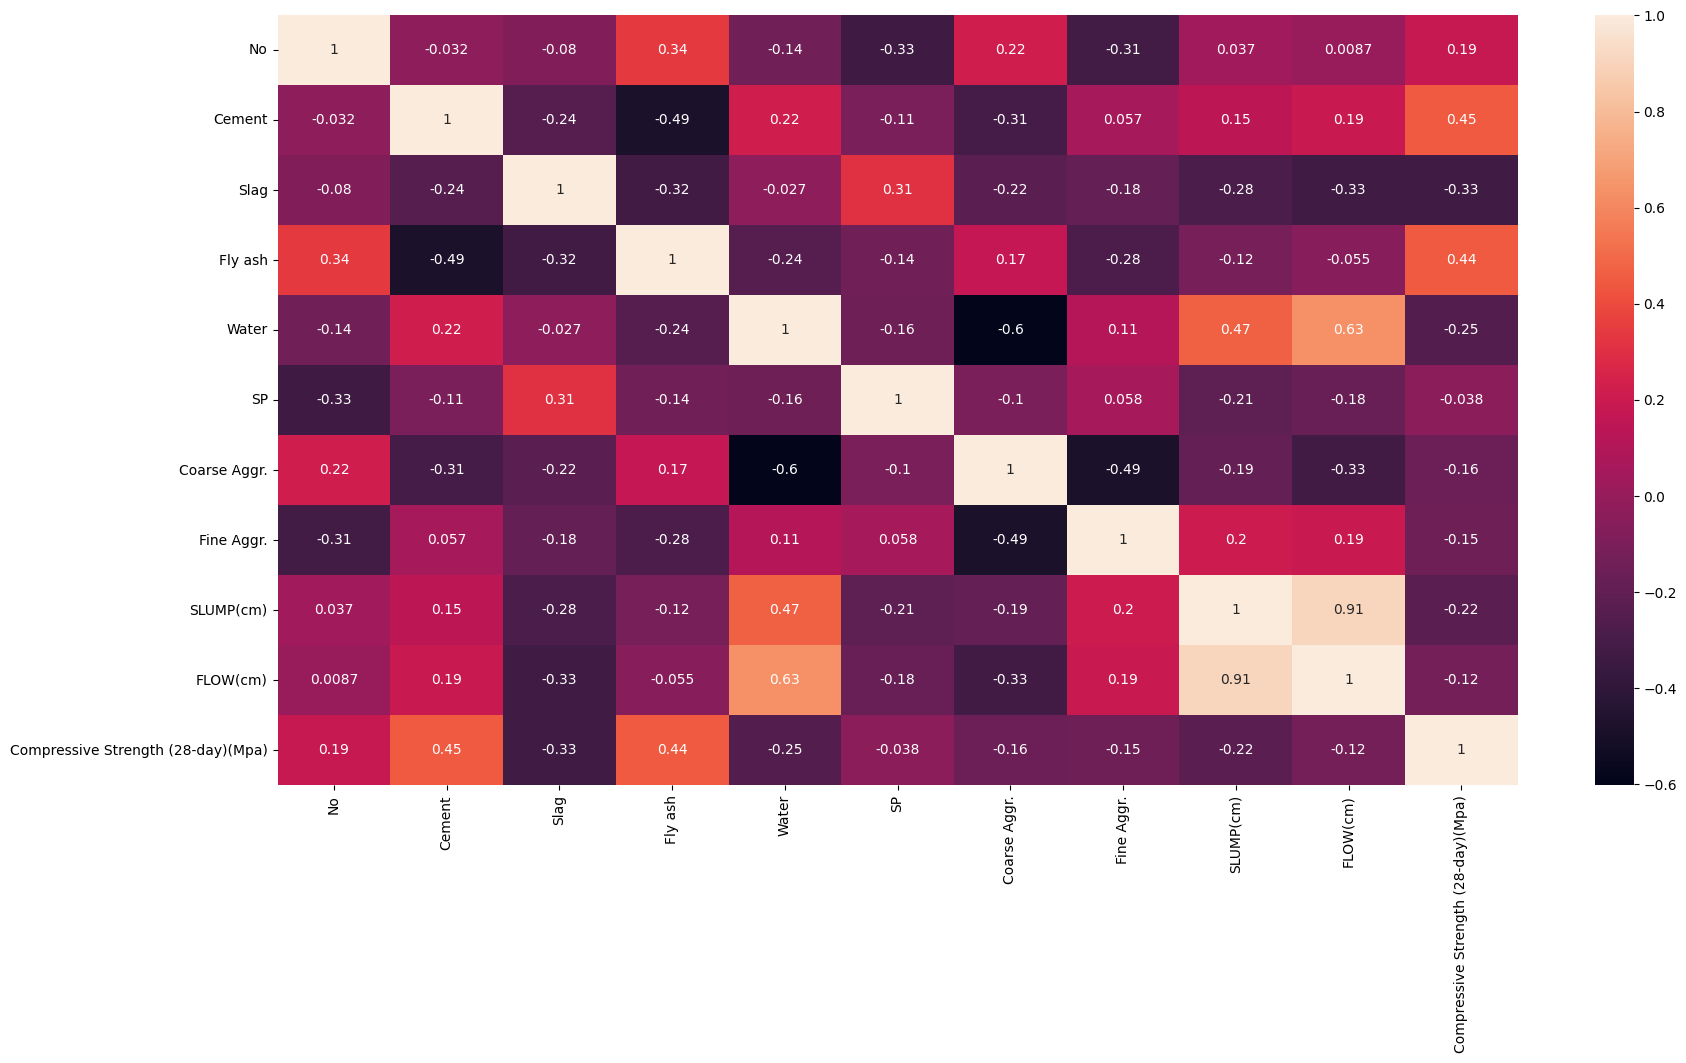

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

#**Machine Learning**

# Train | Test Split and Scaling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['Compressive Strength (28-day)(Mpa)'], axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(72, 31, 72, 31)

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Support Vector Machines - Regression
There are three different implementations of Support Vector Regression:

 * SVR,
 * NuSVR
 * LinearSVR.

**LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR.**

In [ ]:
from sklearn.svm import SVR,LinearSVR

ϵ in SVR defines a region of tolerance where errors are not penalized. It's a key parameter for controlling the flexibility and complexity of the SVR model, directly influencing how robust the model is to noise and how well it generalizes.

In [ ]:
base_model = SVR()
base_model.fit(x_train,y_train)

SVR()

In [ ]:
base_pred = base_model.predict(x_test)
base_pred

array([33.58078042, 36.09571499, 35.41736281, 34.74740535, 38.32091091,
       37.29135101, 35.13249153, 37.22209398, 38.99666006, 40.18462213,
       36.1139343 , 33.79592293, 34.06545599, 35.44211789, 38.76779704,
       39.00173987, 38.22089913, 36.48306636, 32.69110598, 34.52873486,
       37.00427398, 36.05366416, 35.54699015, 33.21812593, 38.19804128,
       36.18409912, 34.82969611, 33.23419531, 35.98790918, 36.28168196,
       34.78339518])

# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
MAE = mean_absolute_error(y_test,base_pred)
MSE = mean_squared_error(y_test,base_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,base_pred)

print(MAE)
print(MSE)
print(RMSE)
print(R2)

5.444660443885889
46.82664252154908
6.842999526636626
0.3161526816532986


# **Grid Search in Attempt for Better Model**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters ={
    'C':np.linspace(0,1,20),
    'kernel':['linear','poly','rbf'],
    'gamma':['scale','auto'],
    'epsilon':np.linspace(0,1,20)
}

In [ ]:
svr = SVR()

In [ ]:
svr_grid_model = GridSearchCV(svr,parameters)

In [ ]:
svr_grid_model.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'epsilon': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
svr_grid_model.best_params_

{'C': np.float64(1.0),
 'epsilon': np.float64(0.7894736842105263),
 'gamma': 'scale',
 'kernel': 'linear'}

In [ ]:
grid_pred = svr_grid_model.predict(x_test)

In [ ]:
# Evaluation

MAE = mean_absolute_error(y_test,grid_pred)
MSE = mean_squared_error(y_test,grid_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,grid_pred)

print(MAE)
print(MSE)
print(RMSE)
print(R2)

3.124440270717089
14.85723868570743
3.8545088773678327
0.7830277319459249


We can see that there is a significant improvement in both MAE and RMSE compared to base model.